In [260]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math

In [261]:
def frame_to_frame_quality(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    camera_positions = ['6x6']
    scenes = ['ArchVizInterior']
    QPs = [20]
    synthesizers = ['AdditiveSynthesizer']
    pose_traces = [f'pose{i}' for i in range(10)]

    dir_paths = []

    for camera_position in camera_positions:
        for scene in scenes:
            for QP in QPs:
                for synthesizer in synthesizers:
                    for pose_trace in pose_traces:
                        dir_paths.append(f'./psnr/{synthesizer}/{camera_position}_{scene}_rec{QP}_{synthesizer}_{pose_trace}_psnr.csv')
    
    df = pd.DataFrame()
    for i in range(len(dir_paths)):
        df_tmp = pd.read_csv(dir_paths[i])
        df_tmp.insert(df_tmp.shape[1], 'pose', f'pose{i}')
        print(df_tmp)
        df = df.append(df_tmp)

    df_tmp = df
    df_tmp = df_tmp.loc[(df_tmp['pose'] == 'pose0') ^ (df_tmp['pose'] == 'pose4')]

    # PSNR    
    ax = sns.lineplot(x='Frame', y=f'psnr_y', style='pose', data=df_tmp)
    ax.set(xlabel="Frame", ylabel=f"PSNR (dB)")
    plt.legend(title="")
    plt.xlim((0,90))
    plt.ylim((0,33)) 
    plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_and_pose4.eps', dpi=300)
    plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_and_pose4.png', dpi=300)
    plt.show()

    # SSIM
    ax = sns.lineplot(x='Frame', y=f'float_ssim', style='pose', data=df_tmp)
    ax.set(xlabel="Frame", ylabel=f"SSIM")
    plt.legend(title="")
    plt.xlim((0,90))
    plt.ylim((0,1)) 
    plt.savefig(f'./img/frame_to_frame_quality/ssim_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_and_pose4.eps', dpi=300)
    plt.savefig(f'./img/frame_to_frame_quality/ssim_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_and_pose4.png', dpi=300)
    plt.show()

    # VMAF
    ax = sns.lineplot(x='Frame', y=f'vmaf', style='pose', data=df_tmp)
    ax.set(xlabel="Frame", ylabel=f"VMAF")
    plt.legend(title="")
    plt.xlim((0,90))
    plt.ylim((0,100))   
    plt.savefig(f'./img/frame_to_frame_quality/vmaf_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_and_pose4.eps', dpi=300)
    plt.savefig(f'./img/frame_to_frame_quality/vmaf_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_and_pose4.png', dpi=300)
    plt.show()

In [262]:
def scene_average_quality(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    df = pd.DataFrame()
    df_tmp = pd.read_csv(f'./results/all_nG1.csv')
    df = df.append(df_tmp)

    camera_position = '6x6'
    scene = 'ArchVizInterior'
    QP = 20
    synthesizer = 'AdditiveSynthesizer'

    df_tmp = df
    df_tmp = df_tmp.loc[(df_tmp['camera_position'] == camera_position) &
                        (df_tmp['scene'] == scene) &
                        (df_tmp['QP'] == QP) &
                        (df_tmp['synthesizer'] == synthesizer)]
    
    df_tmp = df_tmp.sort_values('psnr_mean', ascending=False)
    df_tmp['new_pose_traces'] = [f'pose{i}' for i in range(10)]

    # PSNR
    ax = sns.barplot(x='new_pose_traces', y=f'psnr_mean', data=df_tmp)
    ax.set(xlabel="Trajectory", ylabel=f"PSNR (dB)")
    plt.ylim((0,33)) 
    plt.savefig(f'./img/average_quality/psnr_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer.eps', dpi=300)
    plt.savefig(f'./img/average_quality/psnr_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # SSIM
    ax = sns.barplot(x='new_pose_traces', y=f'ssim_mean', data=df_tmp)
    ax.set(xlabel="Trajectory", ylabel=f"SSIM")
    plt.ylim((0,1))   
    plt.savefig(f'./img/average_quality/ssim_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer.eps', dpi=300)
    plt.savefig(f'./img/average_quality/ssim_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # VMAF
    ax = sns.barplot(x='new_pose_traces', y=f'vmaf_mean', data=df_tmp)
    ax.set(xlabel="Trajectory", ylabel=f"VMAF")
    plt.ylim((0,100))   
    plt.savefig(f'./img/average_quality/vmaf_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer.eps', dpi=300)
    plt.savefig(f'./img/average_quality/vmaf_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer.png', dpi=300)
    plt.show()

In [263]:
def average_quality(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    df = pd.DataFrame()
    df_tmp = pd.read_csv(f'./results/all_nG1.csv')
    df = df.append(df_tmp)

    camera_position = '6x6'
    QP = 20
    synthesizer = 'AdditiveSynthesizer'

    df_tmp = df
    df_tmp = df_tmp.loc[(df_tmp['camera_position'] == camera_position) &
                        (df_tmp['QP'] == QP) &
                        (df_tmp['synthesizer'] == synthesizer)]

    # PSNR
    ax = sns.barplot(x='scene', y=f'psnr_mean', data=df_tmp)
    ax.set(xlabel="Scene", ylabel=f"PSNR (dB)")
    plt.xticks(rotation=-45)
    plt.ylim((0,33)) 
    plt.savefig(f'./img/average_quality/psnr_scene_in_6x6_rec20_AdditiveSynthesizer.eps', dpi=300)
    plt.savefig(f'./img/average_quality/psnr_scene_in_6x6_rec20_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # SSIM
    ax = sns.barplot(x='scene', y=f'ssim_mean', data=df_tmp)
    ax.set(xlabel="Scene", ylabel=f"SSIM")
    plt.xticks(rotation=-45)
    plt.ylim((0,1))   
    plt.savefig(f'./img/average_quality/ssim_scene_in_6x6_rec20_AdditiveSynthesizer.eps', dpi=300)
    plt.savefig(f'./img/average_quality/ssim_scene_in_6x6_rec20_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # VMAF
    ax = sns.barplot(x='scene', y=f'vmaf_mean', data=df_tmp)
    ax.set(xlabel="Scene", ylabel=f"VMAF")
    plt.xticks(rotation=-45)
    plt.ylim((0,100))   
    plt.savefig(f'./img/average_quality/vmaf_scene_in_6x6_rec20_AdditiveSynthesizer.eps', dpi=300)
    plt.savefig(f'./img/average_quality/vmaf_scene_in_6x6_rec20_AdditiveSynthesizer.png', dpi=300)
    plt.show()

In [264]:
def main():
    # setup paras
    # camera_positions = np.array(["6x6", "9x4", "12x3", "18x2"])
    # scenes = np.array(['ArchVizInterior', 'LightroomInteriorDayLight', 'office', 'RealisticRendering', 'XoioBerlinFlat'])
    # QPs = np.array([20, 36, 44, 48, 50])
    # synthesizers = np.array(["AdditiveSynthesizer", "ViewWeightingSynthesizer"])
    # numGroups = np.array([1])
    # pose_traces = np.array([f'pose{i}' for i in range(10)])
    # numFrame = 1

    # 1
    camera_positions = np.array(["6x6", "9x4", "12x3", "18x2"])
    scenes = np.array(['ArchVizInterior', 'LightroomInteriorDayLight', 'office', 'RealisticRendering', 'XoioBerlinFlat'])
    QPs = np.array([20, 36, 44, 48, 50])
    synthesizers = np.array(["AdditiveSynthesizer", "ViewWeightingSynthesizer"])
    numGroups = np.array([1, 4])
    pose_traces = np.array([f'pose{i}' for i in range(10)])
    numFrame = 1

    average_quality(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame)
    


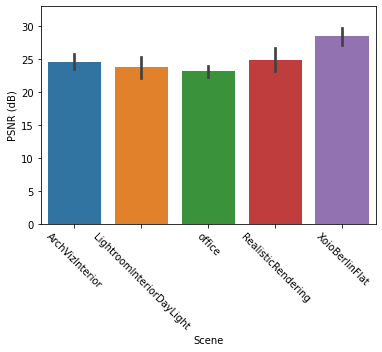

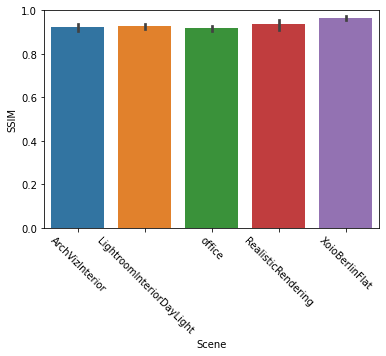

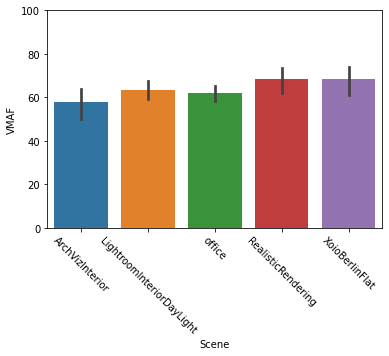

In [265]:
if __name__ == '__main__':
    main()